In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import math

# for creating a responsive plot
%matplotlib widget

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### Sine wave with different amplitude and wavelength

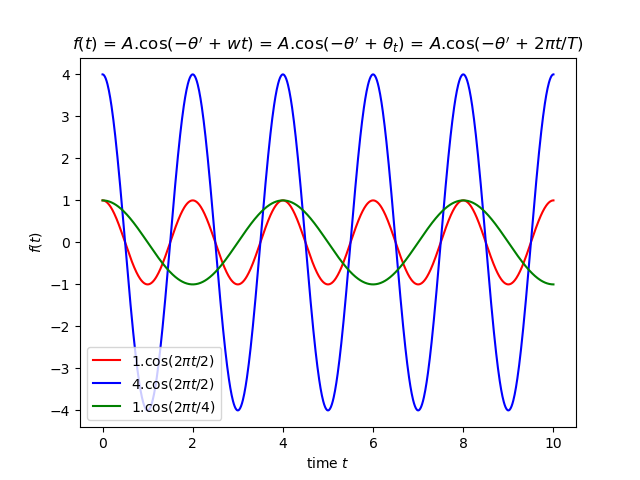

In [2]:
def get_cosinewave_y(A, T, theta, x):
    y = [A * math.cos(theta + 2*math.pi*i/T) for i in x]
    return y

#default sine wave
plt.figure()
x = np.linspace(0, 10, 1000)
theta = 0
y = get_cosinewave_y(A=1, T=2, theta=theta, x=x)
plt.plot(x, y, 'r', label=r'1.cos($2 \pi t$/2)')

# higher amplitude sine wave
y = get_cosinewave_y(A=4, T=2, theta=theta, x=x)
plt.plot(x, y, 'b', label=r'4.cos($2 \pi t$/2)')

# longer wave-length
y = get_cosinewave_y(A=1, T=4, theta=theta, x=x)
plt.plot(x, y, 'g', label=r'1.cos($2 \pi t$/4)')

plt.title(r'$g(t)$ = $A$.cos($-\theta^\prime$ + $wt$) = $A$.cos($-\theta^\prime$ + $\theta_t$) = $A$.cos($-\theta^\prime$ + $2 \pi t /T$)')
plt.xlabel(r'time $t$')
plt.ylabel(r'$g(t)$')
plt.legend()
plt.show()


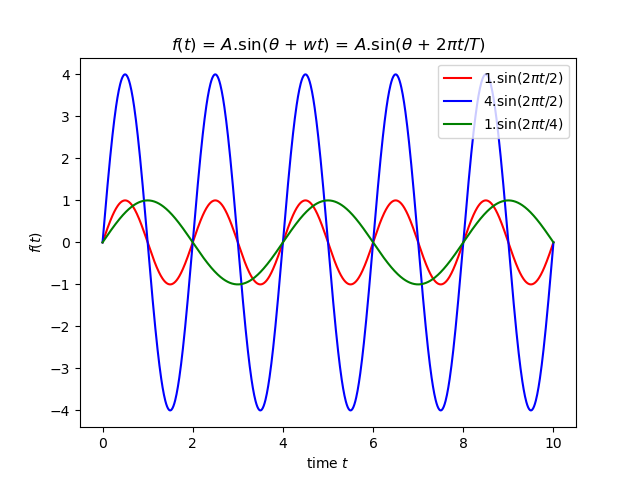

In [3]:
def get_sinewave_y(A, T, theta, x):
    y = [A * math.sin(theta + 2*math.pi*i/T) for i in x]
    return y

#default sine wave
plt.figure()
x = np.linspace(0, 10, 1000)
theta = 0
y = get_sinewave_y(A=1, T=2, theta=theta, x=x)
plt.plot(x, y, 'r', label=r'1.sin($2 \pi t$/2)')

# higher amplitude sine wave
y = get_sinewave_y(A=4, T=2, theta=theta, x=x)
plt.plot(x, y, 'b', label=r'4.sin($2 \pi t$/2)')

# longer wave-length
y = get_sinewave_y(A=1, T=4, theta=theta, x=x)
plt.plot(x, y, 'g', label=r'1.sin($2 \pi t$/4)')

plt.title(r'$g(t)$ = $A$.sin($\theta$ + $wt$) = $A$.sin($\theta$ + $2 \pi t /T$)')
plt.xlabel(r'time $t$')
plt.ylabel(r'$g(t)$')
plt.legend()
plt.show()

### Multiple basis sinusoids with different frequencies can construct a function f(t)  and their amplitude (or "contribution") are captured on the amplitude spectrum.

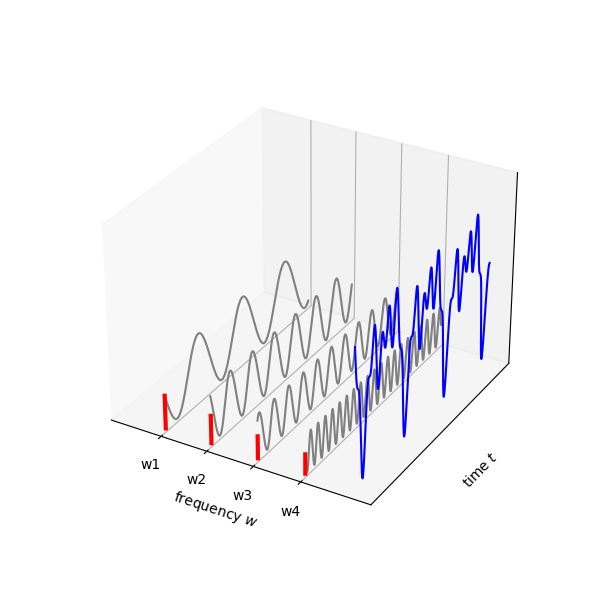

In [4]:
def convert_wave_to_3dplot_convention(x, y, scalar):
    xline = np.full_like(x, scalar)
    yline = x
    zline = y
    return xline, yline, zline

plt.figure(figsize=(6, 6))
ax = plt.axes(projection='3d')

x = np.linspace(0, 100, 1000)
ys = list()
As = [1.2, 1, 0.8, 0.7]
Ts = [30, 15, 10, 5]
thetas = [math.pi*i for i in [1, 0.75, 0.25, -1]]
xticks = [i*3 for i in range(1, 5, 1)]
for A, T, theta, xtick, in zip(As, Ts, thetas, xticks):
    y = get_sinewave_y(A=A, T=T, theta=theta, x=x)
    y = y + np.max(y)
    
    # collect y to construct original function f(t)
    ys.append(y)

    # convert to follow 3d plotting convention
    xline, yline, zline = convert_wave_to_3dplot_convention(x, y, xtick)
    ax.plot3D(xline, yline, zline, 'gray')
    # ax.plot(x, y, zs=0, zdir='y')


# plot original function f(t)
y = np.sum(ys, axis=0)
xline, yline, zline = convert_wave_to_3dplot_convention(x, y, 15)
ax.plot3D(xline, yline, zline, 'blue')

# plot amplitude spectrum
for A, xtick in zip(As, xticks):
    ax.plot([xtick, xtick], [0, 0], [0, A], linewidth=3, c='red')


# determine the bound of 3d plot
ax.axes.set_xlim3d(left=0, right=16)
ax.axes.set_ylim3d(bottom=-1, top=100)
ax.axes.set_zlim3d(bottom=0, top=np.max(y)+1)

ax.set_xlabel(r'frequency $w$')
ax.set_xticks(xticks)
ax.set_xticklabels([r'w'+f'{i}' for i in [1, 2, 3, 4]])
ax.set_ylabel(r'time $t$')
ax.set_yticks([])
ax.set_zticks([])

plt.show()

### Any sinunoid can be expressed as a combination of a sine and cosine.

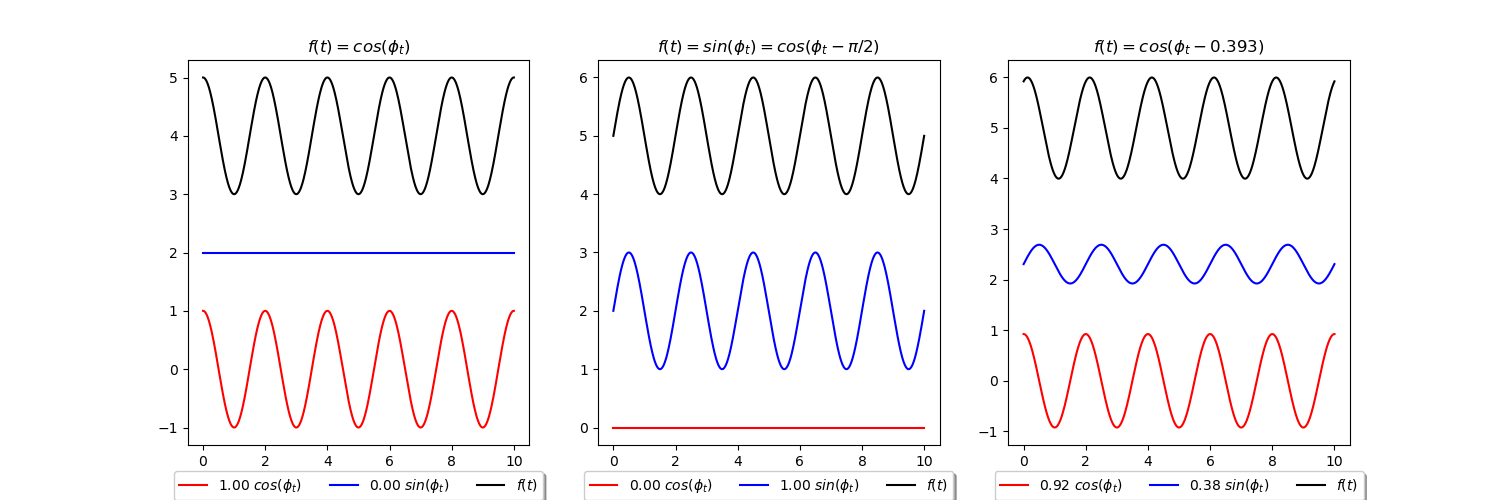

In [5]:
def get_cosinewave_y(A, T, theta, x):
    y = [A * math.cos(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def get_sinewave_y(A, T, theta, x):
    y = [A * math.sin(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def plot_ft_sine_cosine(ax, theta, A, T, title):
    yticks = []

    # original sinusoid
    x = np.linspace(0, 10, 1000)
    # sinunoid = get_cosinewave_y(A, T, -theta, x)
    # plt.plot(x, sinunoid, 'gray') 

    # cosine wave
    C = A * math.cos(theta)
    mean_shift_in_y_axis = 0
    cosine = get_cosinewave_y(C, T, 0, x) 
    yticks.append(mean_shift_in_y_axis)
    ax.plot(x, cosine + mean_shift_in_y_axis, 'red', label=f'{C:.2f} ' + r'$cos(\phi_t)$') 

    # sine wave
    D = A * math.sin(theta)
    mean_shift_in_y_axis = C + 1 + D
    sine = get_sinewave_y(D, T, 0, x)
    yticks.append(mean_shift_in_y_axis)
    ax.plot(x, sine + mean_shift_in_y_axis, 'blue', label=f'{D:.2f} ' + r'$ sin(\phi_t)$') 

    # reconstructed sinusoid
    mean_shift_in_y_axis += C + D*2 + 1
    yticks.append(mean_shift_in_y_axis)
    ax.plot(x, sine + cosine + mean_shift_in_y_axis, 'black', label= r'$f(t)$')

    ax.set_title(title)
    ax.set_xlabel(r'time t')
    # ax.set_yticks(yticks)
    # ax.set_yticklabels([ 
    #     f'{C:.2f}' + r'$C cos(\phi_t)$',
    #     f'{D:.2f}' + r'$ sin(\phi_t)$', 
    #     r'$f(t)$'])
    # ax.legend(loc='lower center', ncol=3)
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

f, ax_list = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
settings = [
    [0., 1, 2, r'$g(t) = cos (\phi_t)$'],
    [math.pi/2, 1, 2, r'$g(t) =  sin (\phi_t) = cos (\phi_t - \pi/2)$'],
    [0.393, 1, 2, r'$g(t) = cos(\phi_t - 0.393)$'],
]
for ax, setting in zip(ax_list, settings):
    theta, A, T, title = setting
    plot_ft_sine_cosine(ax, theta, A, T, title)
plt.show()


[0, 2.9600886422938038, 6.494619425528697]
1.5 1.3856465013527142 0.5744421409410894


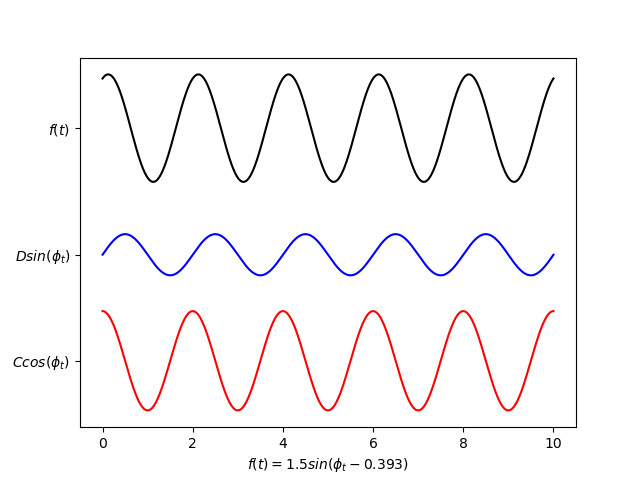

In [63]:
def get_cosinewave_y(A, T, theta, x):
    y = [A * math.cos(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def get_sinewave_y(A, T, theta, x):
    y = [A * math.sin(theta + 2*math.pi*i/T) for i in x]
    return np.array(y)

def plot_ft_sine_cosine(ax, theta, A, T):

# ax = plt.figure()
f, ax = plt.subplots()

yticks = []

# original sinusoid
theta = 0.393 # radian
A = 1.5
T = 2
x = np.linspace(0, 10, 1000)
# sinunoid = get_cosinewave_y(A, T, -theta, x)
# plt.plot(x, sinunoid, 'gray') 

# cosine wave
C = A * math.cos(theta)
mean_shift_in_y_axis = 0
cosine = get_cosinewave_y(C, T, 0, x) 
yticks.append(mean_shift_in_y_axis)
plt.plot(x, cosine + mean_shift_in_y_axis, 'red') 

# sine wave
D = A * math.sin(theta)
mean_shift_in_y_axis = C + 1 + D
sine = get_sinewave_y(D, T, 0, x)
yticks.append(mean_shift_in_y_axis)
plt.plot(x, sine + mean_shift_in_y_axis, 'blue') 

# reconstructed sinusoid
mean_shift_in_y_axis += C + D*2 + 1
yticks.append(mean_shift_in_y_axis)
plt.plot(x, sine + cosine + mean_shift_in_y_axis, 'black')


plt.title(r'')
plt.xlabel(r'$g(t) = 1.5 sin(\phi_t - 0.393)$')
print (yticks)
print (A, C, D)
ax.set_yticks(yticks)
ax.set_yticklabels([r'$C cos(\phi_t)$', r'$D sin(\phi_t)$', r'$f(t)$'])
plt.show()





In [64]:
plt.close('all')